In [1]:
##%matplotlib notebook

In [2]:
## Import Dependencies
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd
import numpy as np
import requests
import time
import os
from datetime import datetime,date

file = "Resources/California_Fire_Incidents.csv"

In [3]:
## Read csv
fire_df = pd.read_csv(file)

In [4]:
## Preview Dataframe
fire_df.head()

,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,...,SearchKeywords,Started,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders
0,257314.0,False,Stanislaus National Forest/Yosemite National Park,NaN,2013,True,/incidents/2013/8/17/rim-fire/,NaN,NaN,Tuolumne,...,"Rim Fire, Stanislaus National Forest, Yosemite...",2013-08-17T15:25:00Z,Finalized,NaN,NaN,NaN,NaN,5fb18d4d-213f-4d83-a179-daaf11939e78,2013-09-06T18:30:00Z,NaN
1,30274.0,False,USFS Angeles National Forest/Los Angeles Count...,NaN,2013,True,/incidents/2013/5/30/powerhouse-fire/,NaN,NaN,Los Angeles,...,"Powerhouse Fire, May 2013, June 2013, Angeles ...",2013-05-30T15:28:00Z,Finalized,NaN,NaN,NaN,NaN,bf37805e-1cc2-4208-9972-753e47874c87,2013-06-08T18:30:00Z,NaN
2,27531.0,False,CAL FIRE Riverside Unit / San Bernardino Natio...,NaN,2013,True,/incidents/2013/7/15/mountain-fire/,NaN,NaN,Riverside,...,"Mountain Fire, July 2013, Highway 243, Highway...",2013-07-15T13:43:00Z,Finalized,NaN,NaN,NaN,NaN,a3149fec-4d48-427c-8b2c-59e8b79d59db,2013-07-30T18:00:00Z,NaN
3,27440.0,False,Tahoe National Forest,NaN,2013,False,/incidents/2013/8/10/american-fire/,NaN,NaN,Placer,...,"American Fire, August 2013, Deadwood Ridge, Fo...",2013-08-10T16:30:00Z,Finalized,NaN,NaN,NaN,NaN,8213f5c7-34fa-403b-a4bc-da2ace6e6625,2013-08-30T08:00:00Z,NaN
4,24251.0,False,Ventura County Fire/CAL FIRE,NaN,2013,True,/incidents/2013/5/2/springs-fire/,Acreage has been reduced based upon more accur...,NaN,Ventura,...,"Springs Fire, May 2013, Highway 101, Camarillo...",2013-05-02T07:01:00Z,Finalized,6.0,10.0,NaN,NaN,46731fb8-3350-4920-bdf7-910ac0eb715c,2013-05-11T06:30:00Z,11.0


In [5]:
## Filter wanted columns
filtered_df= fire_df[["AcresBurned","ArchiveYear","Counties","Extinguished","Latitude","Longitude","Name","Started"]]
filtered_df.head()

,AcresBurned,ArchiveYear,Counties,Extinguished,Latitude,Longitude,Name,Started
0,257314.0,2013,Tuolumne,2013-09-06T18:30:00Z,37.857000,-120.086000,Rim Fire,2013-08-17T15:25:00Z
1,30274.0,2013,Los Angeles,2013-06-08T18:30:00Z,34.585595,-118.423176,Powerhouse Fire,2013-05-30T15:28:00Z
2,27531.0,2013,Riverside,2013-07-30T18:00:00Z,33.709500,-116.728850,Mountain Fire,2013-07-15T13:43:00Z
3,27440.0,2013,Placer,2013-08-30T08:00:00Z,39.120000,-120.650000,American Fire,2013-08-10T16:30:00Z
4,24251.0,2013,Ventura,2013-05-11T06:30:00Z,0.000000,0.000000,Springs Fire,2013-05-02T07:01:00Z


In [6]:
## Check for missing values
filtered_df.count()

AcresBurned     1633
ArchiveYear     1636
Counties        1636
Extinguished    1577
Latitude        1636
Longitude       1636
Name            1636
Started         1636
dtype: int64

In [7]:
## Drop rows with any nan value
clean_fire_df = filtered_df.dropna(how="any")

In [8]:
## Check clean Dataframe
clean_fire_df.count()

AcresBurned     1577
ArchiveYear     1577
Counties        1577
Extinguished    1577
Latitude        1577
Longitude       1577
Name            1577
Started         1577
dtype: int64

In [9]:
## Check variable types
clean_fire_df.dtypes

AcresBurned     float64
ArchiveYear       int64
Counties         object
Extinguished     object
Latitude        float64
Longitude       float64
Name             object
Started          object
dtype: object

In [10]:
## Grouped by year and summed acres burned per year
acres_by_year = filtered_df.groupby(["ArchiveYear"])
sum_acresburned = acres_by_year["AcresBurned"].sum()
sum_acresburned

ArchiveYear
2013     527745.0
2014     448715.0
2015     574503.0
2016     505927.0
2017    1793915.0
2018    3358049.0
2019     285708.0
Name: AcresBurned, dtype: float64

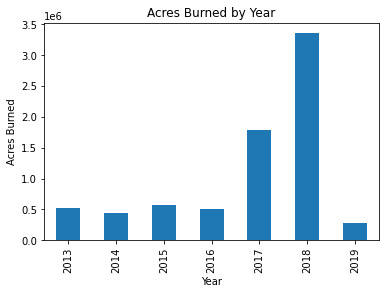

In [11]:
## Bar Plot
sum_acresburned.plot(kind="bar")

plt.title("Acres Burned by Year")
plt.ylabel("Acres Burned")
plt.xlabel("Year")

# Save figure as .png
plt.savefig("Acres_Burned_by_Year_Bar.png")

plt.show()

In [12]:
## Create Dataframe for sum acres burned
sum_acresburned_df = pd.DataFrame(sum_acresburned)

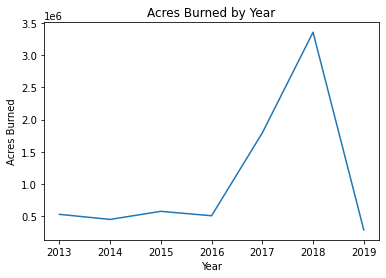

In [13]:
## Plot Line Chart
year = sum_acresburned_df.index
total_acres = sum_acresburned_df["AcresBurned"]

plt.plot(year, total_acres)

plt.title("Acres Burned by Year")
plt.ylabel("Acres Burned")
plt.xlabel("Year")

# Save figure as .png
plt.savefig("Acres_Burned_by_Year_Line.png")

plt.show()

In [14]:
## Find total fires per county
counties_count = clean_fire_df["Counties"].value_counts()
counties_df = pd.DataFrame({"Fires Per County": counties_count})
counties_df

,Fires Per County
Riverside,142
San Diego,85
Butte,65
San Luis Obispo,62
Shasta,62
Kern,60
Fresno,56
Siskiyou,53
Tehama,51
San Bernardino,50


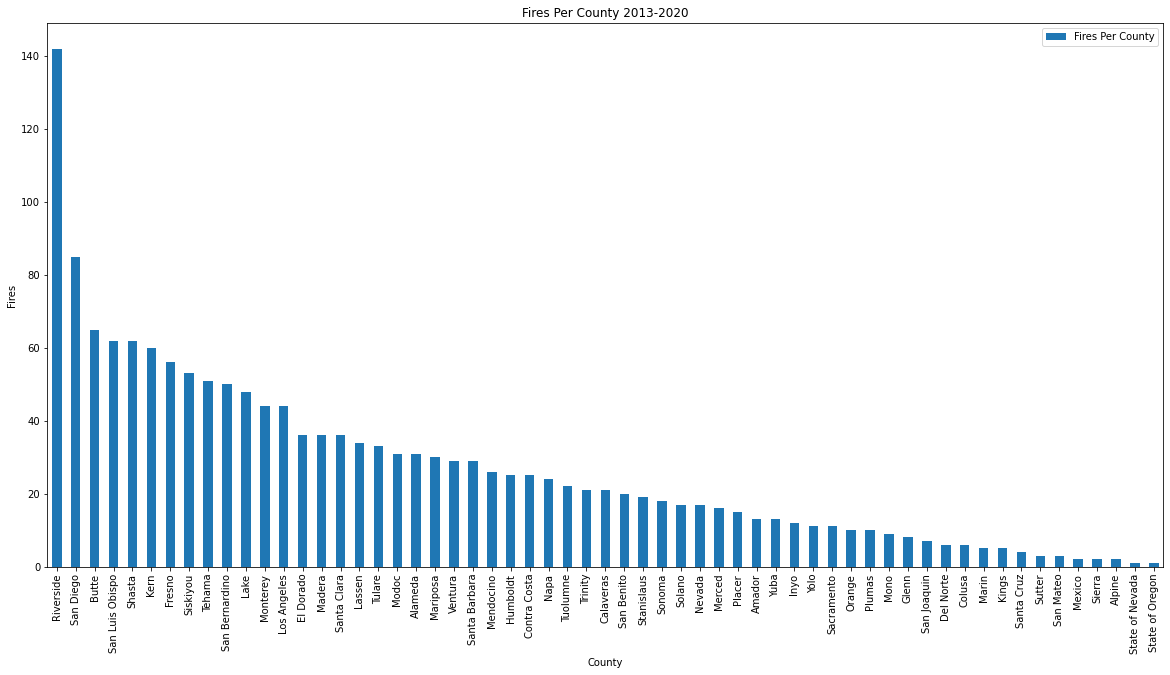

In [15]:
## Bar Plot
counties_df.plot(kind="bar", figsize=(20,10))

plt.title("Fires Per County 2013-2020")
plt.ylabel("Fires")
plt.xlabel("County")

# Save figure as .png
plt.savefig("Fires_Per_County_Bar.png")

plt.show()

In [16]:
clean_fire_df["Convert Date"] = pd.to_datetime(clean_fire_df["Started"])
clean_fire_df["Month Started"] = clean_fire_df["Convert Date"].dt.month

C:\Users\peter\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\peter\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
clean_fire_df

,AcresBurned,ArchiveYear,Counties,Extinguished,Latitude,Longitude,Name,Started,Convert Date,Month Started
0,257314.0,2013,Tuolumne,2013-09-06T18:30:00Z,37.857000,-120.086000,Rim Fire,2013-08-17T15:25:00Z,2013-08-17 15:25:00+00:00,8
1,30274.0,2013,Los Angeles,2013-06-08T18:30:00Z,34.585595,-118.423176,Powerhouse Fire,2013-05-30T15:28:00Z,2013-05-30 15:28:00+00:00,5
2,27531.0,2013,Riverside,2013-07-30T18:00:00Z,33.709500,-116.728850,Mountain Fire,2013-07-15T13:43:00Z,2013-07-15 13:43:00+00:00,7
3,27440.0,2013,Placer,2013-08-30T08:00:00Z,39.120000,-120.650000,American Fire,2013-08-10T16:30:00Z,2013-08-10 16:30:00+00:00,8
4,24251.0,2013,Ventura,2013-05-11T06:30:00Z,0.000000,0.000000,Springs Fire,2013-05-02T07:01:00Z,2013-05-02 07:01:00+00:00,5
...,...,...,...,...,...,...,...,...,...,...
1627,10.0,2019,Riverside,2019-09-10T10:45:00Z,33.496633,-116.631106,Bailey Fire,2019-09-10T10:43:58Z,2019-09-10 10:43:58+00:00,9
1629,10.0,2019,Siskiyou,2019-06-21T14:23:00Z,41.946220,-122.401570,IronGate Fire,2019-06-16T20:33:00Z,2019-06-16 20:33:00+00:00,6
1630,10.0,2019,Butte,2019-05-08T08:47:00Z,39.839580,-121.957000,Cana Fire,2019-04-30T12:20:00Z,2019-04-30 12:20:00+00:00,4
1631,9.0,2019,Riverside,2019-10-10T18:11:00Z,33.827979,-117.499619,Eagle Fire,2019-10-10T12:08:00Z,2019-10-10 12:08:00+00:00,10


In [18]:
clean_fire_df.dtypes

AcresBurned                  float64
ArchiveYear                    int64
Counties                      object
Extinguished                  object
Latitude                     float64
Longitude                    float64
Name                          object
Started                       object
Convert Date     datetime64[ns, UTC]
Month Started                  int64
dtype: object

In [19]:
## Fires by Month 2013-2020
month_count = clean_fire_df["Month Started"].value_counts()
fires_per_month_df = pd.DataFrame({"Total Fires Started Per Month": month_count})
fires_per_month_df = fires_per_month_df.sort_index()
fires_per_month_df

,Total Fires Started Per Month
1,11
2,10
3,6
4,35
5,140
6,319
7,396
8,271
9,195
10,133


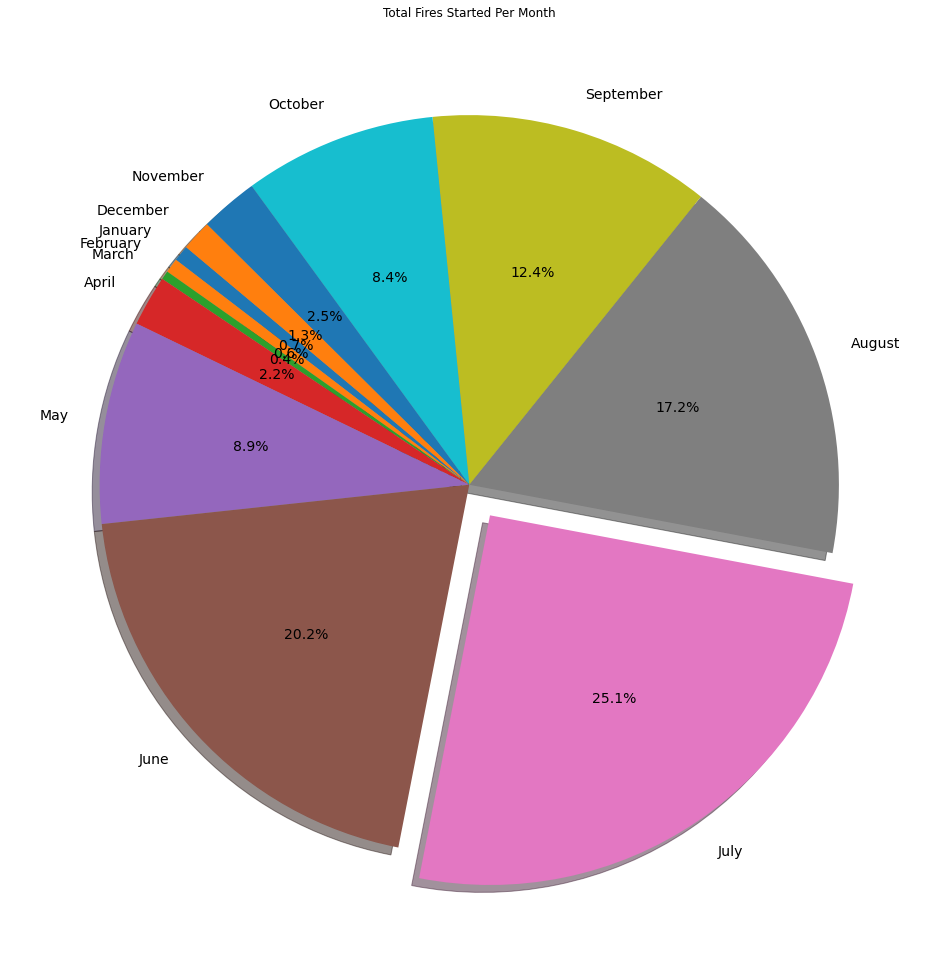

In [20]:
## Pie Plot

fig = plt.figure(figsize=(17,17))
labels=["January","February","March","April","May","June","July","August","September","October","November","December"]
sizes= fires_per_month_df["Total Fires Started Per Month"]
explode = (0, 0, 0, 0, 0, 0, 0.1, 0, 0, 0, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, textprops={'fontsize': 14},
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Total Fires Started Per Month")

# Save figure as .png
plt.savefig("Total_Fires_Per_Month_Pie.png")

plt.show()

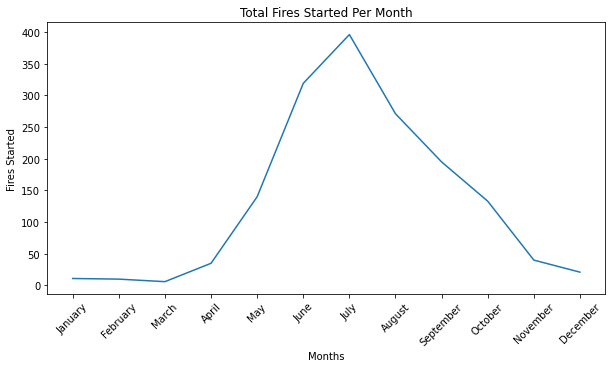

In [21]:
## Plot Line Chart
fig = plt.figure(figsize=(10,5))

month = fires_per_month_df.index
fires_by_month = fires_per_month_df["Total Fires Started Per Month"]

plt.plot(month, fires_by_month)

plt.title("Total Fires Started Per Month")
plt.ylabel("Fires Started")
plt.xlabel("Months")

months = fires_per_month_df.index
x_axis = np.arange(len(months))
tick_locations=[value for value in x_axis+1]
plt.xticks(tick_locations,["January","February","March","April","May","June","July","August","September","October","November","December"],rotation=45)


# Save figure as .png
plt.savefig("Total_Fires_Per_Month_Line.png")

plt.show()